In [1]:
library(datateachr)
library(cowplot)
library(infer)
library(knitr)
library(tidyverse)

library(palmerpenguins)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
penguins_nest <- penguins %>% 
    select(c(species,body_mass_g)) %>%
    mutate(species = as.character(species)) %>% 
    drop_na() %>% 
    group_by(species) %>% 
    nest()


penguins_nest

species,data
<chr>,<list>
Adelie,"3750, 3800, 3250, 3450, 3650, 3625, 4675, 3475, 4250, 3300, 3700, 3200, 3800, 4400, 3700, 3450, 4500, 3325, 4200, 3400, 3600, 3800, 3950, 3800, 3800, 3550, 3200, 3150, 3950, 3250, 3900, 3300, 3900, 3325, 4150, 3950, 3550, 3300, 4650, 3150, 3900, 3100, 4400, 3000, 4600, 3425, 2975, 3450, 4150, 3500, 4300, 3450, 4050, 2900, 3700, 3550, 3800, 2850, 3750, 3150, 4400, 3600, 4050, 2850, 3950, 3350, 4100, 3050, 4450, 3600, 3900, 3550, 4150, 3700, 4250, 3700, 3900, 3550, 4000, 3200, 4700, 3800, 4200, 3350, 3550, 3800, 3500, 3950, 3600, 3550, 4300, 3400, 4450, 3300, 4300, 3700, 4350, 2900, 4100, 3725, 4725, 3075, 4250, 2925, 3550, 3750, 3900, 3175, 4775, 3825, 4600, 3200, 4275, 3900, 4075, 2900, 3775, 3350, 3325, 3150, 3500, 3450, 3875, 3050, 4000, 3275, 4300, 3050, 4000, 3325, 3500, 3500, 4475, 3425, 3900, 3175, 3975, 3400, 4250, 3400, 3475, 3050, 3725, 3000, 3650, 4250, 3475, 3450, 3750, 3700, 4000"
Gentoo,"4500, 5700, 4450, 5700, 5400, 4550, 4800, 5200, 4400, 5150, 4650, 5550, 4650, 5850, 4200, 5850, 4150, 6300, 4800, 5350, 5700, 5000, 4400, 5050, 5000, 5100, 4100, 5650, 4600, 5550, 5250, 4700, 5050, 6050, 5150, 5400, 4950, 5250, 4350, 5350, 3950, 5700, 4300, 4750, 5550, 4900, 4200, 5400, 5100, 5300, 4850, 5300, 4400, 5000, 4900, 5050, 4300, 5000, 4450, 5550, 4200, 5300, 4400, 5650, 4700, 5700, 4650, 5800, 4700, 5550, 4750, 5000, 5100, 5200, 4700, 5800, 4600, 6000, 4750, 5950, 4625, 5450, 4725, 5350, 4750, 5600, 4600, 5300, 4875, 5550, 4950, 5400, 4750, 5650, 4850, 5200, 4925, 4875, 4625, 5250, 4850, 5600, 4975, 5500, 4725, 5500, 4700, 5500, 4575, 5500, 5000, 5950, 4650, 5500, 4375, 5850, 4875, 6000, 4925, 4850, 5750, 5200, 5400"
Chinstrap,"3500, 3900, 3650, 3525, 3725, 3950, 3250, 3750, 4150, 3700, 3800, 3775, 3700, 4050, 3575, 4050, 3300, 3700, 3450, 4400, 3600, 3400, 2900, 3800, 3300, 4150, 3400, 3800, 3700, 4550, 3200, 4300, 3350, 4100, 3600, 3900, 3850, 4800, 2700, 4500, 3950, 3650, 3550, 3500, 3675, 4450, 3400, 4300, 3250, 3675, 3325, 3950, 3600, 4050, 3350, 3450, 3250, 4050, 3800, 3525, 3950, 3650, 3650, 4000, 3400, 3775, 4100, 3775"


In [24]:
penguins

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007
Adelie,Torgersen,39.2,19.6,195,4675,male,2007
Adelie,Torgersen,34.1,18.1,193,3475,NA,2007


In [29]:
ci_pipeline(penguins)

Warning message:
“Removed 2 rows containing missing values.”


lower_ci,upper_ci
<dbl>,<dbl>
4120.757,4291.595


Warning message:
“Removed 2 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”


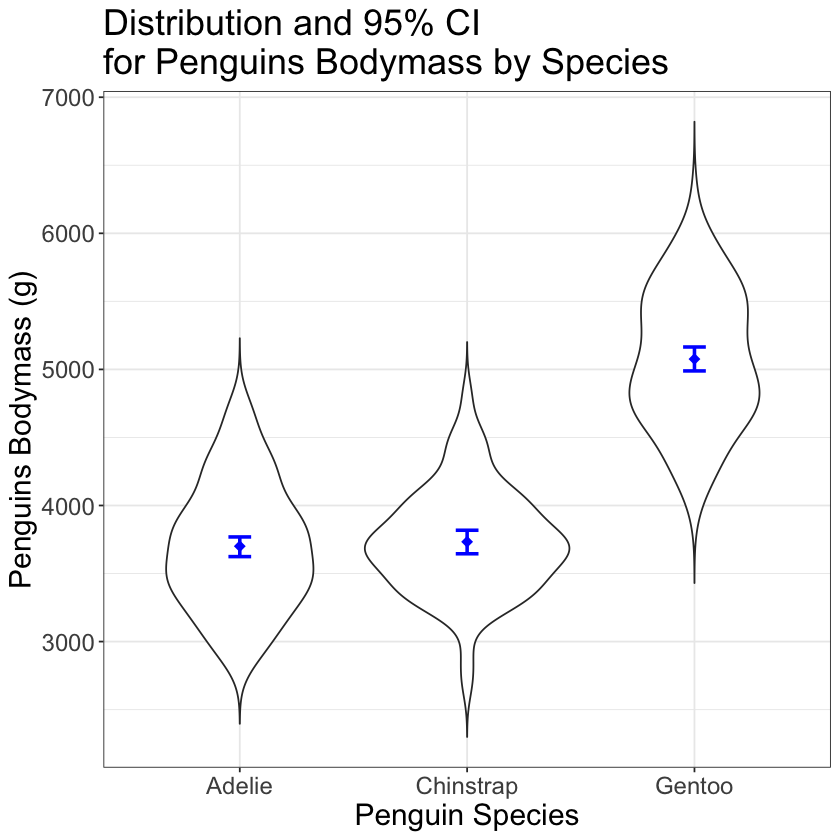

In [21]:
ci_pipeline <- function(sample){
    sample %>% 
        specify(response = body_mass_g) %>% 
        generate(reps = 1000, type = "bootstrap")  %>% 
        calculate(stat = "mean")  %>% 
        get_confidence_interval(level = 0.95, type = "percentile")
}


# nested penguins dataset with data, point_estimate, and lower_ci and upper_ci
penguins_samples <- penguins %>% 
    select(c(species,body_mass_g)) %>%
    mutate(species = as.character(species)) %>% 
    drop_na() %>% 
    group_by(species) %>% 
    nest() %>% 
    mutate(percentile_ci = map(data, ci_pipeline)) %>% 
    mutate(point_estimate = map_dbl(data, ~ mean(.x$body_mass_g))) %>% 
    unnest(percentile_ci)

# plot violins
violin_plot_with_ci <- penguins %>% 
    ggplot(aes(x = species, y = body_mass_g)) + 
    geom_violin(trim = FALSE) +
    stat_summary(fun = mean, geom = "point", shape = 18, size = 3, color = "blue") +
    geom_errorbar(data = penguins_samples, 
                  mapping = aes(x = species, 
                                y = point_estimate, 
                                ymin = lower_ci, 
                                ymax = upper_ci), 
                  size = 1, color = "blue", width=.1) + 
    ggtitle("Distribution and 95% CI \nfor Penguins Bodymass by Species ") +
    xlab("Penguin Species") +
    ylab("Penguins Bodymass (g)") +
    theme_bw() + 
    theme(text = element_text(size = 18))

violin_plot_with_ci

In [112]:

poll_data <- read_csv("data/angus_reid_poll.csv")
poll_samples <- poll_data %>% 
    rep_sample_n(size = 714, reps = 10000, replace=TRUE) %>% 
    count(party) %>%
    summarise(stat = n / 714)



── Column specification ────────────────────────────────────────────────────────
cols(
  party = col_character()
)


`summarise()` regrouping output by 'replicate' (override with `.groups` argument)



In [107]:
nrow(poll_samples)

[1] 40000

In [87]:
ci_pipeline <- function(sample){
    sample %>% 
        get_confidence_interval(level = 0.95, type = "percentile")
}


poll_df <- poll_samples %>% 
    group_by(party) %>% 
    nest() %>%
    mutate(percentile_ci = map(data, ci_pipeline)) %>% 
    mutate(point_estimate = map_dbl(data, ~ mean(.x$stat))) %>% 
    unnest(percentile_ci)

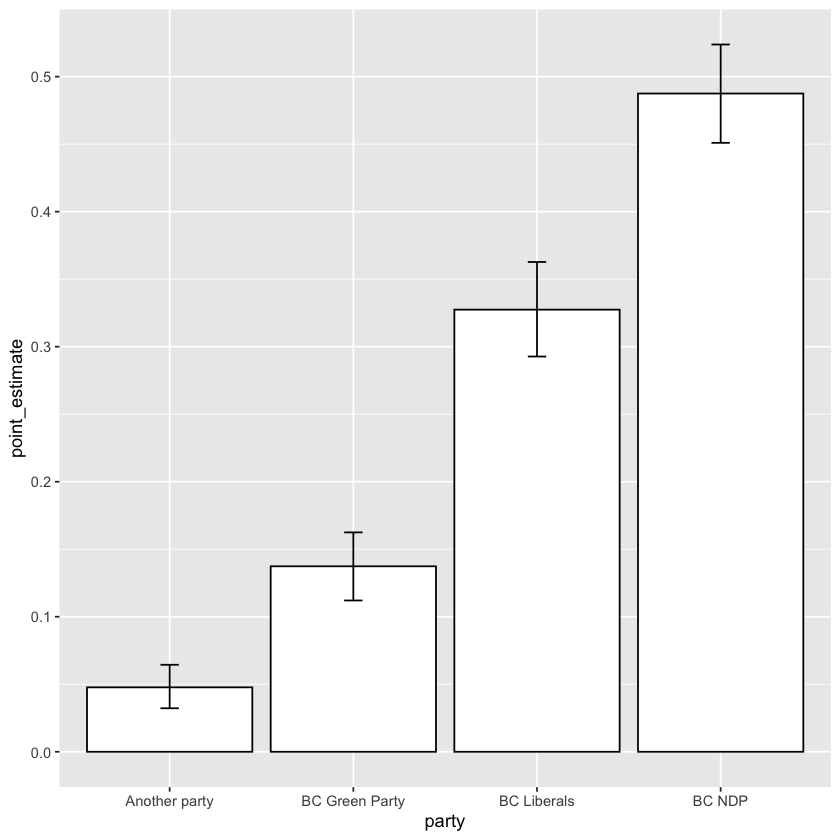

In [101]:

bar <- ggplot(poll_df)+
    aes(x = party, y = point_estimate) +
    geom_bar(stat = "identity",
             fill = "white",
             colour="black") +
    geom_errorbar(data = poll_df,
                  mapping = aes(ymin = lower_ci, 
                                ymax = upper_ci), 
                  width = 0.1)

bar

In [ ]:
poll_samples %>% 
    group_by(party) %>% 
    nest() %>%
    mutate(percentile_ci = map(data, ci_pipeline)) %>% 
    mutate(point_estimate = map_dbl(data, ~ mean(.x$body_mass_g))) %>% 
    unnest(percentile_ci)


penguins_samples <- penguins %>% 
    select(c(species,body_mass_g)) %>%
    mutate(species = as.character(species)) %>% 
    drop_na() %>% 
    group_by(species) %>% 
    nest() %>% 
    mutate(percentile_ci = map(data, ci_pipeline)) %>% 
    mutate(point_estimate = map_dbl(data, ~ mean(.x$body_mass_g))) %>% 
    unnest(percentile_ci)



In [ ]:
# ci_pipeline <- function(sample){
#     sample %>% 
#         specify(response = body_mass_g) %>% 
#         generate(reps = 1000, type = "bootstrap")  %>% 
#         calculate(stat = "mean")  %>% 
#         get_confidence_interval(level = 0.95, type = "percentile")
# }


# # nested penguins dataset with data, point_estimate, and lower_ci and upper_ci
# penguins_samples <- penguins %>% 
#     select(c(species,body_mass_g)) %>%
#     mutate(species = as.character(species)) %>% 
#     drop_na() %>% 
#     group_by(species) %>% 
#     nest() %>% 
#     mutate(percentile_ci = map(data, ci_pipeline)) %>% 
#     mutate(point_estimate = map_dbl(data, ~ mean(.x$body_mass_g))) %>% 
#     unnest(percentile_ci)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Removed 1 rows containing missing values.”
Joining, by = "species"

Warning message:
“Removed 1 rows containing missing values.”


p_value
<dbl>
0.66


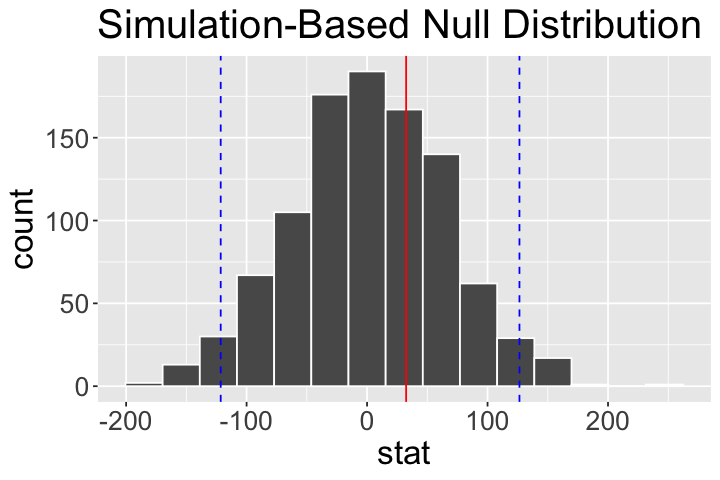

In [158]:
set.seed(2020)
# prepare dataset
# ------------------------------------------------------------------------
species_body_data <- penguins %>%
    filter(species == "Chinstrap" | species == "Adelie") %>% 
    select(species, body_mass_g)

# group and summarize data
species_body_est <- species_body_data %>% 
    group_by(species) %>% 
    summarize(body_mass_mean = mean(body_mass_g, na.rm = TRUE))


# get confidence intervals
# ------------------------------------------------------------------------
# get ci's for Chinstrap species
Chinstrap_ci <-  species_body_data %>% 
    filter(species == "Chinstrap")  %>% 
    specify(response = body_mass_g)  %>% 
    generate(reps = 1000, type = "bootstrap")  %>% 
    calculate(stat = "mean")  %>% 
    get_ci() %>% 
    mutate(species = "Chinstrap")

# get ci's for Adelie species
Adelie_ci <-  species_body_data %>% 
    filter(species == "Adelie")  %>% 
    specify(response = body_mass_g)  %>% 
    generate(reps = 1000, type = "bootstrap")  %>% 
    calculate(stat = "mean")  %>% 
    get_ci() %>% 
    mutate(species = "Adelie")

# bind together ci's from Chinstrap and Adelie
cis <- bind_rows(Adelie_ci, Chinstrap_ci)

# join estimates and confidence intervals
species_body_est <- left_join(species_body_est, cis)



# start generating simulated data
# ------------------------------------------------------------------------
# get diff of values in `body_mass_mean` column 
delta_sample <- diff(species_body_est$body_mass_mean)

# using infer package to generate the simulated data under the model H0
null_distribution_penguins <- species_body_data %>% 
    specify(formula = body_mass_g ~ species)  %>% 
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>% 
    calculate(stat = "diff in means", order = c("Adelie", "Chinstrap"))


# visualization
# ------------------------------------------------------------------------
# Visualize the distribution of our  H0 with threashold alpha(0.05) and delta*
options(repr.plot.width = 6, repr.plot.height = 4)

threshold <- quantile(null_distribution_penguins$stat, c(0.025, 0.975))

h0_dist <- null_distribution_penguins %>% 
    visualize() +
    geom_vline(xintercept = c(threshold[[1]], threshold[[2]]), 
                     color = "blue",
                    lty = 2) +
    geom_vline(xintercept = delta_sample, color = "red") +
    theme(text = element_text(size=20))



# result
# ------------------------------------------------------------------------
# plot
h0_dist 

# calculate p-value with infer
null_distribution_penguins %>% 
    get_pvalue(obs_stat = delta_sample, direction = "both")
